# Figures

In [3]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig1 = plt.figure(figsize=(7, 6.6), dpi=600, facecolor="None")

fig1 = plt.figure(figsize=(13, 12), dpi=600)
gs1 = GridSpec(2, 2, fig1)

ax00 = fig1.add_subplot(gs1[0, 0])
ax01 = fig1.add_subplot(gs1[0, 1])
ax10 = fig1.add_subplot(gs1[1, 0])
ax11 = fig1.add_subplot(gs1[1, 1])

# ax00.set_aspect("equal")
# ax01.set_aspect("equal")
# ax002.set_aspect("equal")

fig1.tight_layout()

<Figure size 4200x3960 with 0 Axes>

## Figure 1

In [59]:
import pandas as pd
from scipy import stats
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from Checkpoints import Checkpoint
from graphing import *
import numpy as np

##### Fig1 #####
sns.set_style("whitegrid")
sns.set_palette("crest")

fig1 = plt.figure(figsize=(12, 11), dpi=600)
gs1 = GridSpec(2, 2, fig1)

##### ax00 ##### 

ax00 = fig1.add_subplot(gs1[0, 0])

if not "two_mod_wide" in locals():
    two_mod_wide = Checkpoint(path="./intermediates/two_mod_wide.tsv").loadCheckpoint()

ax00.set_aspect("equal")
div00 = make_axes_locatable(ax00)
cax00 = div00.append_axes("right", size="5%", pad=0.05)
sns.histplot(two_mod_wide, x="percentMeth_WGBS", y="percentMeth_Nanopore", 
             bins=20, pthresh=0.01, stat="proportion", cbar=True, cbar_kws={"label" : "Proportion"}, cbar_ax=cax00, ax=ax00)

ax00.set_xlim((0, 100))
ax00.set_ylim((0, 100))
ax00.set_xlabel("WGBS \u03B2$_{\%}$")
ax00.set_ylabel("Nanopore \u03B2$_{\%}$")
ax00.set_title("A", loc="left")

##### ax01 ##### 

ax01 = fig1.add_subplot(gs1[0, 1])

if not "mc_df_wide" in locals():
    mc_df_wide = Checkpoint(path="./intermediates/mc_df_wide.tsv").loadCheckpoint()

ax01.set_aspect("equal")
div01 = make_axes_locatable(ax01)
cax01 = div01.append_axes("right", size="5%", pad=0.05)
sns.histplot(mc_df_wide, x="percentMeth_oxBS_5mC", y="percentMeth_Nanopore_5mC", 
             bins=20, pthresh=0.01, stat="proportion", cbar=True, cbar_kws={"label" : "Proportion"}, cbar_ax=cax01, ax=ax01)

ax01.set_xlim((0, 100))
ax01.set_ylim((0, 100))
ax01.set_xlabel("oxBS \u03B2$_{\%}$")
ax01.set_ylabel("Nanopore \u03B2$_{\%}$")
ax01.set_title("B", loc="left")
ax01.xaxis.set_major_locator(MultipleLocator(20))

##### ax10 ##### 

if not "hmc_df_wide" in locals():
    hmc_df_wide = Checkpoint(path="./intermediates/hmc_df_wide.tsv").loadCheckpoint()

ax10 = fig1.add_subplot(gs1[1, 0])

ax10.set_aspect("equal")
div10 = make_axes_locatable(ax10)
cax10 = div10.append_axes("right", size="5%", pad=0.05)
sns.histplot(hmc_df_wide, x="percentMeth_TAB_5hmC", y="percentMeth_Nanopore_5hmC", 
             bins=20, pthresh=0.01, stat="proportion", cbar=True, cbar_kws={"label" : "Proportion"}, cbar_ax=cax10, ax=ax10)

ax10.set_xlim((0, 100))
ax10.set_ylim((0, 100))
ax10.set_xlabel("TAB \u03B2$_{\%}$")
ax10.set_ylabel("Nanopore \u03B2$_{\%}$")
ax10.set_title("C", loc="left")
ax10.xaxis.set_major_locator(MultipleLocator(20))

##### ax11 ##### 

ax11 = fig1.add_subplot(gs1[1, 1])

ax11.set_aspect("equal")
ax11.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), "black", linestyle=":")

for i, df in enumerate([two_mod_wide, mc_df_wide, hmc_df_wide]):
    roc = ROCPlot(df, 66)
    roc.plotROC(ax11, ["vs. WGBS", "vs. oxBS", "vs. TAB"][i], ls=["-", "--", ":"][i])

ax11.set_title("D", loc="left")
ax11.set_xlabel("False positive rate")
ax11.set_ylabel("True positive rate")
ax11.legend()

##### Save Figure ##### 

fig1.tight_layout()
fig1.savefig('/u/n/doh28/Documents/Nanopore_HMC/Figures/Figure1.png', bbox_inches="tight")
plt.close()

## Figure 1 Stats

In [74]:
import numpy as np
from sklearn import metrics
from scipy import stats
import pandas as pd
from Checkpoints import Checkpoint
from graphing import ROCPlot

def mean_signed_deviation(est, pred):
    msd = np.average(pred - est)
    return msd

if not "two_mod_wide" in locals():
    two_mod_wide = Checkpoint(path="./intermediates/two_mod_wide.tsv").loadCheckpoint()
if not "mc_df_wide" in locals():
    mc_df_wide = Checkpoint(path="./intermediates/mc_df_wide.tsv").loadCheckpoint()
if not "hmc_df_wide" in locals():
    hmc_df_wide = Checkpoint(path="./intermediates/hmc_df_wide.tsv").loadCheckpoint()

In [77]:
r_two_mod, r_mc, r_hmc = stats.pearsonr(two_mod_wide["percentMeth_WGBS"], two_mod_wide["percentMeth_Nanopore"]).statistic, stats.pearsonr(mc_df_wide["percentMeth_oxBS_5mC"], mc_df_wide["percentMeth_Nanopore_5mC"]).statistic, stats.pearsonr(hmc_df_wide["percentMeth_TAB_5hmC"], hmc_df_wide["percentMeth_Nanopore_5hmC"]).statistic
mae_two_mod, mae_mc, mae_hmc = metrics.mean_absolute_error(two_mod_wide["percentMeth_WGBS"], two_mod_wide["percentMeth_Nanopore"]), metrics.mean_absolute_error(mc_df_wide["percentMeth_oxBS_5mC"], mc_df_wide["percentMeth_Nanopore_5mC"]), metrics.mean_absolute_error(hmc_df_wide["percentMeth_TAB_5hmC"], hmc_df_wide["percentMeth_Nanopore_5hmC"])
rmse_two_mod, rmse_mc, rmse_hmc = metrics.mean_squared_error(two_mod_wide["percentMeth_WGBS"], two_mod_wide["percentMeth_Nanopore"], squared=False), metrics.mean_squared_error(mc_df_wide["percentMeth_oxBS_5mC"], mc_df_wide["percentMeth_Nanopore_5mC"], squared=False), metrics.mean_squared_error(hmc_df_wide["percentMeth_TAB_5hmC"], hmc_df_wide["percentMeth_Nanopore_5hmC"], squared=False)
msd_two_mod, msd_mc, msd_hmc = mean_signed_deviation(two_mod_wide["percentMeth_WGBS"], two_mod_wide["percentMeth_Nanopore"]), mean_signed_deviation(mc_df_wide["percentMeth_oxBS_5mC"], mc_df_wide["percentMeth_Nanopore_5mC"]), mean_signed_deviation(hmc_df_wide["percentMeth_TAB_5hmC"], hmc_df_wide["percentMeth_Nanopore_5hmC"])

print(f"Binary caller:\tr={r_two_mod}\tMAD={mae_two_mod}\tRMSE={rmse_two_mod}\tMSD={msd_two_mod}\n5mC caller:\tr={r_mc}\tMAD={mae_mc}\tRMSE={rmse_mc}\tMSD={msd_mc}\n5hmC caller:\tr={r_hmc}\tMAD={mae_hmc}\tRMSE={rmse_hmc}\tMSD={msd_hmc}\n")

Binary caller:	r=0.9267654097510415	MAD=8.54308016362844	RMSE=11.794314813567036	MSD=-2.591962271736803
5mC caller:	r=0.8116068890682385	MAD=11.55831958913348	RMSE=15.22968942721506	MSD=0.9477068076219897
5hmC caller:	r=0.5342485630641761	MAD=8.708983529160735	RMSE=12.282170226070066	MSD=-0.17399765197043585



In [42]:
models = ["Binary caller", "5mC caller", "5hmC caller"]
for i, df in enumerate([two_mod_wide, mc_df_wide, hmc_df_wide]):
    roc = ROCPlot(df, 66)
    print(models[i], ":\tAUC=", roc.calculateAUC().round(2))

Binary caller :	AUC= 0.97
5mC caller :	AUC= 0.88
5hmC caller :	AUC= 0.91


# Figure 2

In [25]:
import pandas as pd

dnmtools_out = pd.read_csv('./DNMTools_datasets/dnmtools_mlml_All.text', sep="\t", 
                           names=["chromosome", "chromStart", "chromEnd", "percentMeth_mC", "percentMeth_hmC", "percentMeth_C", "N_conflicts"])

nano_all = pd.read_csv('./data/Nanopore_ternary_data/prom_R10.4.1_E8.2_WGS_brain_0.9.1_mods.bed', sep="\t", 
                       names=["chromosome", "chromStart", "chromEnd", "mod_type", "score", "strand", "i1", "i2", "i3", "readCount", "percentMeth_mC", "N_C", "N_mC", "N_filt", "N_NA", "N_hmC"])

nano_all["readCount_T"] = nano_all.loc[:, ("N_C", "N_mC", "N_hmC")].sum(axis="columns")
nano_all = nano_all.loc[nano_all.loc[:, "readCount_T"].gt(10)]
nano_all["percentMeth_C"] = nano_all["N_C"].divide(nano_all["readCount_T"])
nano_all["percentMeth_hmC"] = nano_all["N_hmC"].divide(nano_all["readCount_T"])
nano_all["percentMeth_mC"] = nano_all["N_mC"].divide(nano_all["readCount_T"])
nano_all.drop(columns=["mod_type", "score", "strand", "i1", "i2", "i3", "readCount", "N_C", "N_mC", "N_filt", "N_NA", "N_hmC", "readCount_T"], inplace=True)

merged_three_mod = pd.merge(nano_all, dnmtools_out, "inner", ["chromosome", "chromStart", "chromEnd"], suffixes=["_Nanopore", "_Bisulphite"])
merged_three_mod["pred"] = merged_three_mod[["percentMeth_mC_Nanopore", "percentMeth_C_Nanopore", "percentMeth_hmC_Nanopore"]].idxmax(axis="columns").replace(["percentMeth_mC_Nanopore", "percentMeth_C_Nanopore", "percentMeth_hmC_Nanopore"], 
                                                                                                                                   ["5mC", "C", "5hmC"])
merged_three_mod["true"] = merged_three_mod[["percentMeth_mC_Bisulphite", "percentMeth_C_Bisulphite", "percentMeth_hmC_Bisulphite"]].idxmax(axis="columns").replace(["percentMeth_mC_Bisulphite", "percentMeth_C_Bisulphite", "percentMeth_hmC_Bisulphite"], 
                                                                                                                                   ["5mC", "C", "5hmC"])

merged_three_mod = merged_three_mod.loc[merged_three_mod.loc[:, "N_conflicts"] < 1]                                                                                                                                

NameError: name 'merged_three_mod' is not defined

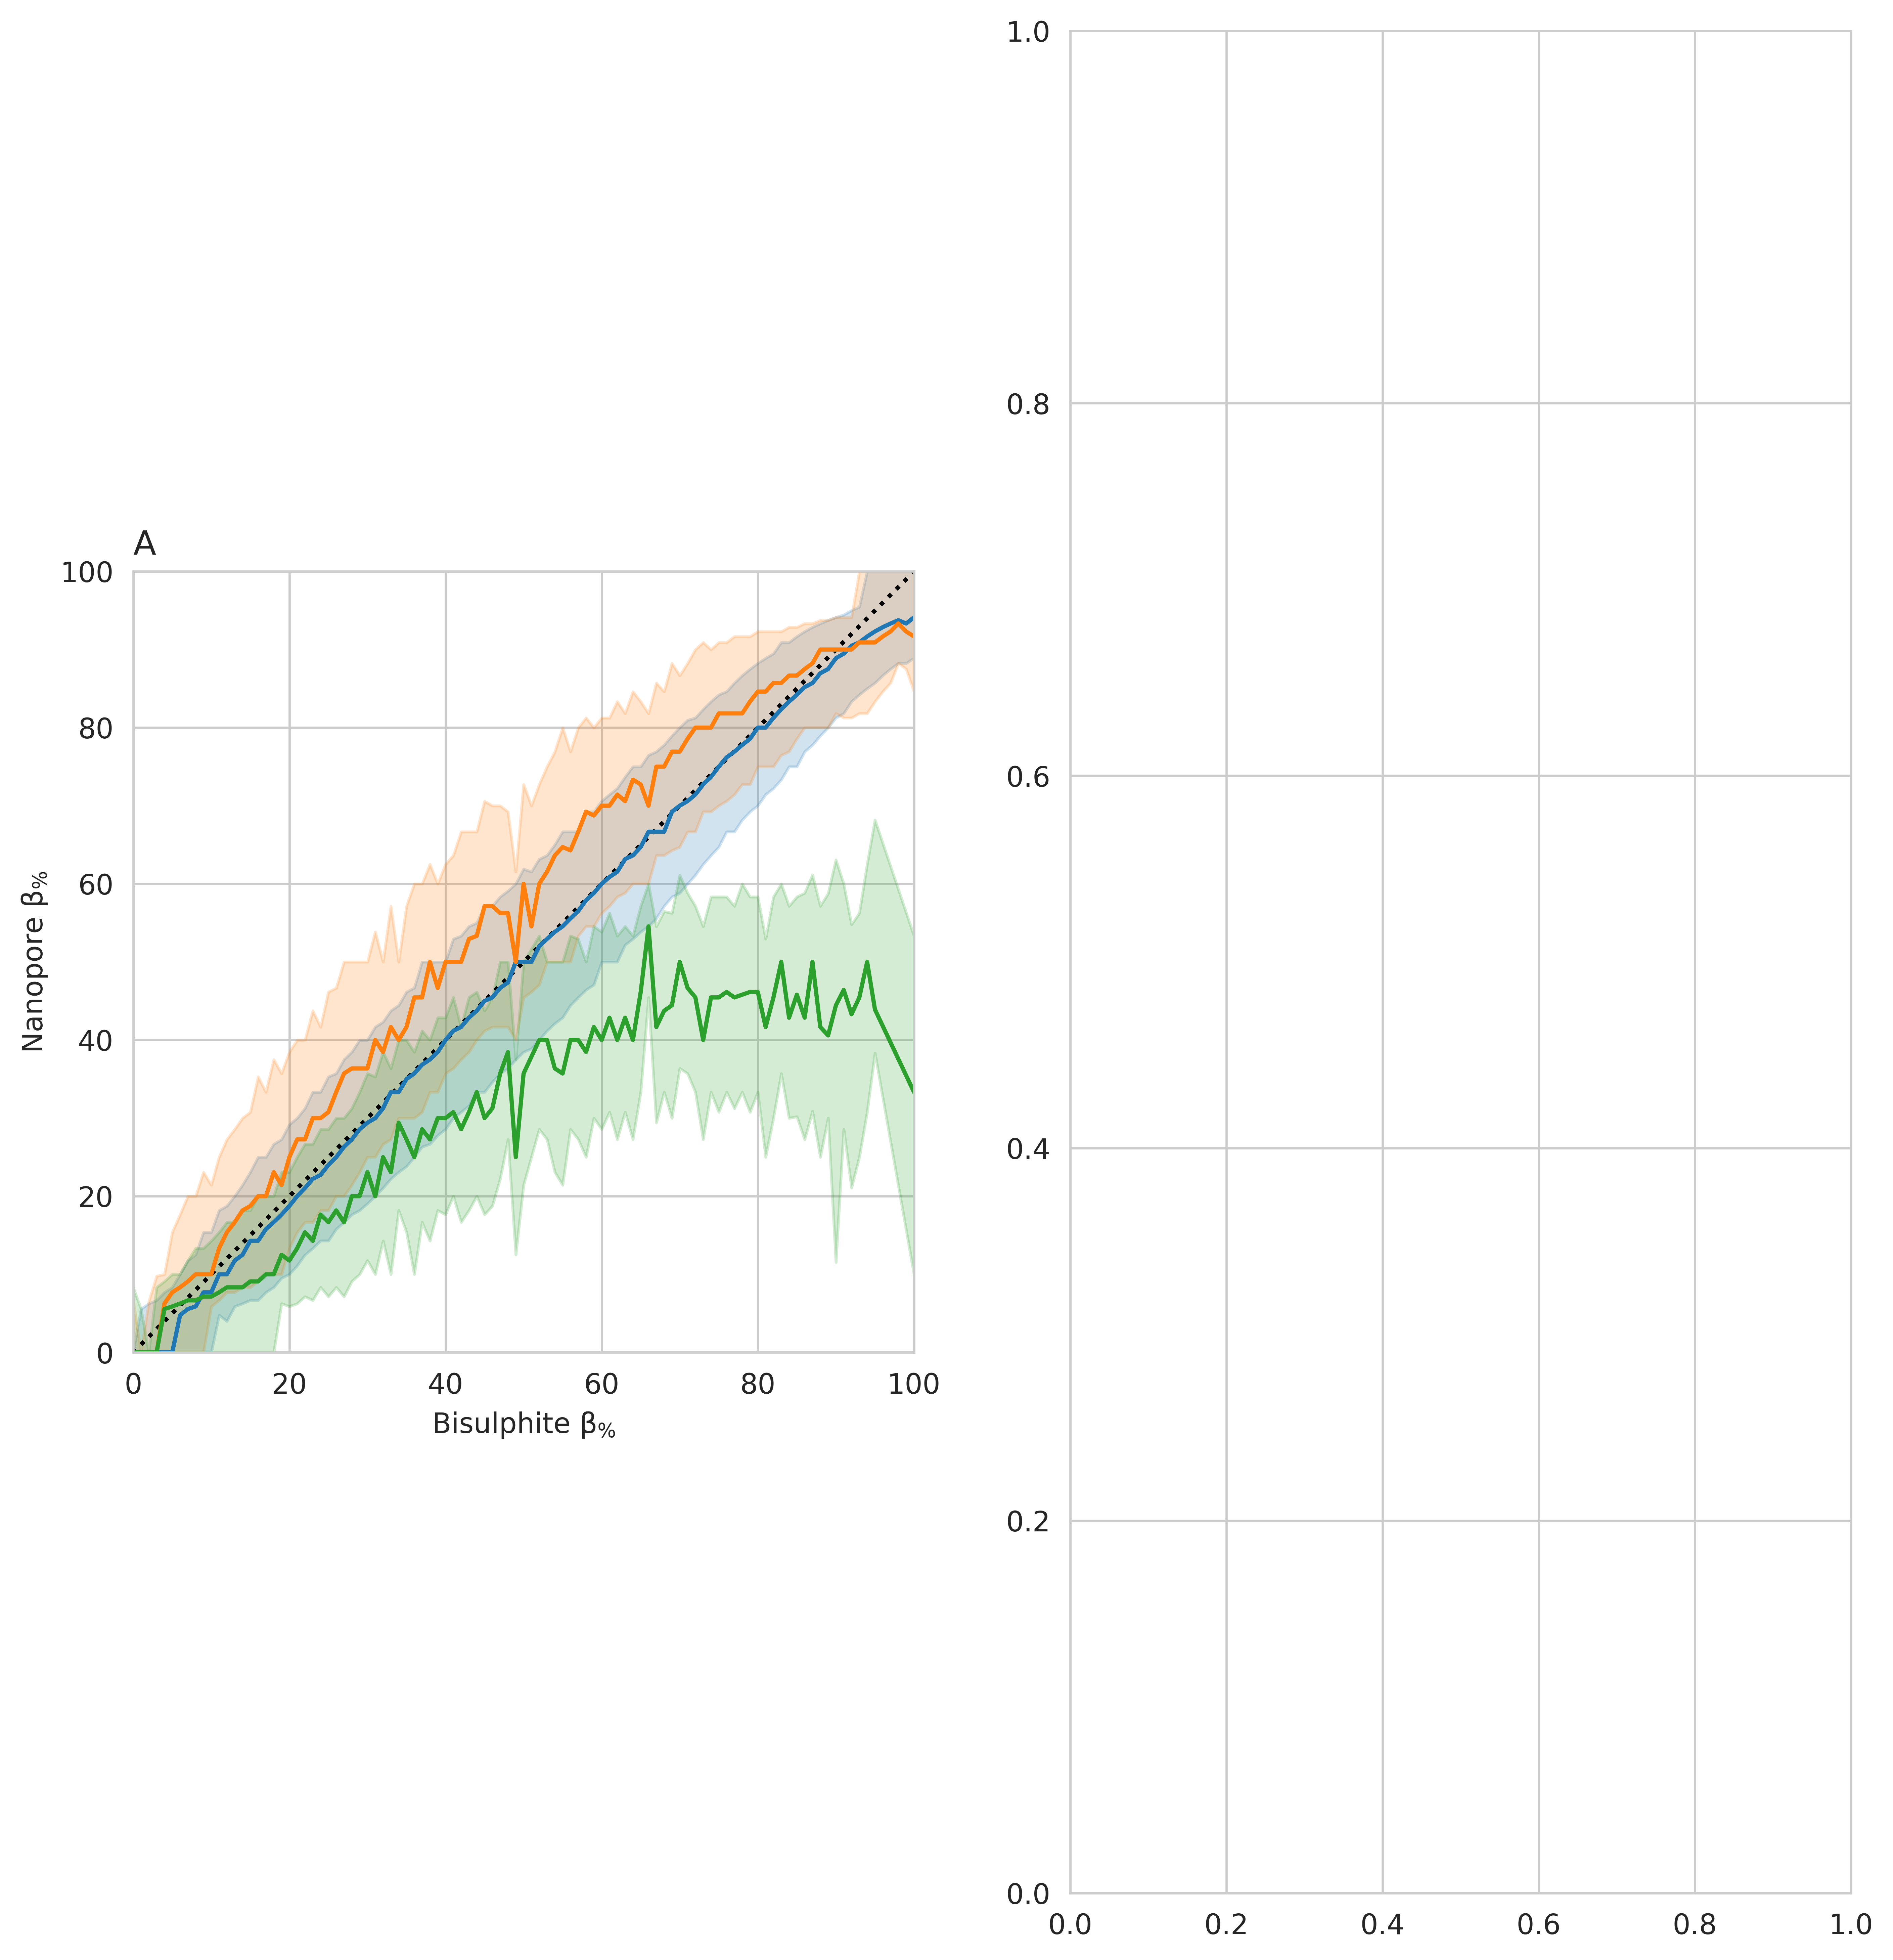

In [57]:
from Checkpoints import Checkpoint
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable
from graphing import linePlot

if not "two_mod_wide" in locals():
    two_mod_wide = Checkpoint(path="./intermediates/two_mod_wide.tsv").loadCheckpoint()
if not "mc_df_wide" in locals():
    mc_df_wide = Checkpoint(path="./intermediates/mc_df_wide.tsv").loadCheckpoint()
if not "hmc_df_wide" in locals():
    hmc_df_wide = Checkpoint(path="./intermediates/hmc_df_wide.tsv").loadCheckpoint()

##### Figure 2 ##### 

fig2 = plt.figure(dpi=600, figsize=(11, 12))
gs2 = GridSpec(1, 2, fig2)

sns.set_style("whitegrid")
sns.set_palette("tab10")

##### ax00 ##### 

ax00 = fig2.add_subplot(gs2[0, 0])

ax00.set_aspect("equal")
ax00.plot(np.arange(0, 101, 1), "black", linestyle=":")

for i in [two_mod_wide, mc_df_wide, hmc_df_wide]:
    linePlot(i, ax00)

ax00.set_xlim((0, 100))
ax00.set_ylim((0, 100))
ax00.set_xlabel("Bisulphite \u03B2$_{\%}$")
ax00.set_ylabel("Nanopore \u03B2$_{\%}$")
ax00.set_title("A", loc="left")

##### ax01 ##### 

ax01 = fig2.add_subplot(gs2[0, 1])

cm = ConfusionMatrixDisplay.from_predictions(merged_three_mod["true"], merged_three_mod["pred"], normalize="true", colorbar=False, cmap="Greens", ax=ax01)

div01 = make_axes_locatable(ax01)
cax01 = div01.append_axes("right", size="5%", pad=0.05)
fig2.colorbar(cm.im_, cax01, label="Proportion of labels (normalised on bisulphite)")

ax01.set_xlabel("Nanopore prediction")
ax01.set_ylabel("Bisulphite prediction")
ax01.set_title("B", loc="left")

##### Save Figure ##### 

fig2.tight_layout()
fig2.savefig('/u/n/doh28/Documents/Nanopore_HMC/Figures/Figure2.png', bbox_inches="tight")
plt.close()

In [27]:
from sklearn import metrics

metrics.cohen_kappa_score(merged_three_mod["pred"], merged_three_mod["true"])

0.7228583102038699

In [55]:
len(hmc_df_wide.loc[hmc_df_wide["percentMeth_TAB_5hmC"] >= 50])/len(hmc_df_wide), len(hmc_df_wide.loc[hmc_df_wide["percentMeth_Nanopore_5hmC"] >= 50])/len(hmc_df_wide)


(0.015771745075558313, 0.024463651203815568)

# Figure 3

In [3]:
import pandas as pd
from common import get_bismark, get_wgbs, filterDepth
from Checkpoints import Checkpoint
import numpy as np

if not "hmc_df_wide" in locals():
    hmc_df_wide = Checkpoint(path="./intermediates/hmc_df_wide.tsv").loadCheckpoint()
    
prediction_data = pd.read_csv('./DNMTools_datasets/dnmtools_mlml_oxBS_WGBS.text', sep="\t", 
                           names=["chromosome", "chromStart", "chromEnd", "percentMeth_mC", "percentMeth_hmC", "percentMeth_C", "N_conflicts"]).query("N_conflicts == 0")

wgbs_data = filterDepth(get_wgbs('./data/WGBS_data/mm39_ENCSR893RHD_merged.bed'))
oxbs_data = filterDepth(get_bismark("./data/oxBS_data/CRR008808_oxBS_remergedRaw.zero.cov_modified.bed", "5mC"))
tab_data = filterDepth(get_bismark('./data/TAB_data/CRR008807_TAB_merged.bedGraph.gz.bismark.zero.cov', "5hmC"))

nano_all = pd.read_csv("./intermediates/nanopore_three_mod.tsv", sep="\t", names=["chromosome", "chromStart", "chromEnd", "percentMeth_mC", "percentMeth_C", "percentMeth_hmC"])

nano_v_predicted = pd.merge(nano_all, prediction_data, "inner", ["chromosome", "chromStart", "chromEnd"], suffixes=["_Nanopore", "_MLML"])

tab_data_v_predicted = pd.merge(tab_data, prediction_data, "inner", ["chromosome", "chromStart", "chromEnd"], suffixes=["_TAB", "_MLML"]).rename(
    columns={"percentMeth" : "percentMeth_hmC_TAB",
             "percentMeth_mC" : "percentMeth_mC_MLML",
             "percentMeth_hmC" : "percentMeth_hmC_MLML",
             "percentMeth_C" : "percentMeth_C_MLML"}
)
tab_data_v_predicted["percentMeth_hmC_MLML"] = tab_data_v_predicted["percentMeth_hmC_MLML"].multiply(100)
tab_data_v_predicted["percentMeth_mC_MLML"] = tab_data_v_predicted["percentMeth_mC_MLML"].multiply(100)
tab_data_v_predicted["percentMeth_C_MLML"] = tab_data_v_predicted["percentMeth_C_MLML"].multiply(100)

In [6]:
subtraction_data = pd.merge(oxbs_data, wgbs_data, "inner", ["chromosome", "chromStart", "chromEnd"], suffixes=["_oxBS", "_WGBS"])
subtraction_data["percentMeth_hmC_subtraction"] = subtraction_data["percentMeth_WGBS"].subtract(subtraction_data["percentMeth_oxBS"])
subtraction_data["percentMeth_C_subtraction"] = np.subtract(100, subtraction_data["percentMeth_WGBS"])
subtraction_data_rel = pd.merge(subtraction_data, tab_data, "inner", ["chromosome", "chromStart", "chromEnd"], suffixes=["_subtraction", "_TAB"]).rename(columns={"percentMeth" : "percentMeth_5hmC_TAB"})

In [10]:
import numpy as np

# the roc plot function I am using has the True values listed in column 5, and the Predicted values in column 7. These have to be rearranged to be compatible. 
nano_v_predicted = nano_v_predicted.loc[:, ("chromosome", "chromStart", "chromEnd", "percentMeth_mC_MLML", "percentMeth_C_MLML", "percentMeth_hmC_MLML", "percentMeth_C_Nanopore", "percentMeth_hmC_Nanopore", "percentMeth_mC_Nanopore")]
tab_data_v_predicted = tab_data_v_predicted.loc[:, ("chromosome", "chromStart", "chromEnd", "readCount", "method", "percentMeth_hmC_TAB", "percentMeth_mC_MLML", "percentMeth_hmC_MLML", "percentMeth_C_MLML")]
subtraction_data_rel = subtraction_data_rel.loc[:, ("chromosome", "chromStart", "chromEnd", "readCount", "method", "percentMeth_5hmC_TAB", "percentMeth_C_subtraction", "percentMeth_hmC_subtraction", "percentMeth_oxBS")]

subtraction_data_rel["bin"] = pd.cut(subtraction_data_rel["percentMeth_5hmC_TAB"], 101, labels=np.arange(0, 101, 1))
nano_v_predicted["bin"] = pd.cut(nano_v_predicted["percentMeth_hmC_Nanopore"], 101, labels=np.arange(0, 101, 1))
tab_data_v_predicted["bin"] = pd.cut(tab_data_v_predicted["percentMeth_hmC_TAB"], 101, labels=np.arange(0, 101, 1))

In [12]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
from graphing import linePlot

##### Figure 2 ##### 

fig3 = plt.figure("fig3", figsize=(10, 5))
gs3 = GridSpec(1, 2)

sns.set_style("whitegrid")

##### ax00 ##### 

ax00 = fig3.add_subplot(gs3[0, 0])
ax00.set_aspect("equal")

ax00.plot(np.arange(0, 101, 1), "black", linestyle=":")
linePlot(Checkpoint(path="./intermediates/hmc_df_wide.tsv").loadCheckpoint(), ax=ax00, label="Nanopore (X) vs. TAB")
# sns.lineplot(x=nano_v_predicted["bin"], y=nano_v_predicted["percentMeth_hmC_MLML"]*100, errorbar=("pi", 50), ls=":", label="MLML vs. Nanopore", ax=ax00)
sns.lineplot(x=subtraction_data_rel["bin"], y=subtraction_data_rel["percentMeth_hmC_subtraction"], errorbar=("pi", 50), ls="--", label="Subtraction (X) vs. TAB", ax=ax00)
sns.lineplot(x=tab_data_v_predicted["bin"], y=tab_data_v_predicted["percentMeth_hmC_MLML"], errorbar=("pi", 50), ls=":", label="MLML (X) vs. TAB", ax=ax00)

ax00.legend()
ax00.set_xlabel("TAB \u03B2$_{\%}$")
ax00.set_ylabel("Comparison \u03B2$_{\%}$")

##### ax01 ##### 

from graphing import ROCPlot
import matplotlib.pyplot as plt

ax01 = fig3.add_subplot(gs3[0, 1])

ROCPlot(hmc_df_wide, 66).plotROC(ax01, "Nanopore vs. TAB", "-")
# ROCPlot(nano_v_predicted, 0.66).plotROC(ax01, "MLML vs. Nanopore", "--")
ROCPlot(subtraction_data_rel, 66).plotROC(ax01, "Subtraction vs. TAB", "--")
ROCPlot(tab_data_v_predicted, 66).plotROC(ax01, "MLML vs. TAB", ":")

ax01.legend()

##### Save Figure ##### 

fig3.tight_layout()
fig3.savefig('/u/n/doh28/Documents/Nanopore_HMC/Figures/Figure3.png', bbox_inches="tight")
plt.close()

# Figure 4

In [38]:
def getPred(df, kind):
    if kind == "Nanopore":
        df["pred"] = df[["percentMeth_C_Nanopore", "percentMeth_mC_Nanopore", "percentMeth_hmC_Nanopore"]].idxmax(axis="columns").replace(
            ["percentMeth_C_Nanopore", "percentMeth_mC_Nanopore", "percentMeth_hmC_Nanopore"], ["C", "5mC", "5hmC"]
            )
    elif kind == "MLML":
        df["pred"] = df[["percentMeth_C_MLML", "percentMeth_mC_MLML", "percentMeth_hmC_MLML"]].idxmax(axis="columns").replace(
            ["percentMeth_C_MLML", "percentMeth_mC_MLML", "percentMeth_hmC_MLML"], ["C", "5mC", "5hmC"]
            )

    return df["pred"]
    
def getTrue(df, kind):
    if kind == "TAB":
        df["true"] = df[["percentMeth_C_TAB", "percentMeth_mC_TAB", "percentMeth_hmC_TAB"]].idxmax(axis="columns").replace(
            ["percentMeth_C_TAB", "percentMeth_mC_TAB", "percentMeth_hmC_TAB"], ["C", "5mC", "5hmC"]
            )
    elif kind == "MLML":
        df["true"] = df[["percentMeth_C_MLML", "percentMeth_mC_MLML", "percentMeth_hmC_MLML"]].idxmax(axis="columns").replace(
            ["percentMeth_C_MLML", "percentMeth_mC_MLML", "percentMeth_hmC_MLML"], ["C", "5mC", "5hmC"]
            )
    elif kind == "Nanopore":
        df["true"] = df[["percentMeth_C_Nanopore", "percentMeth_mC_Nanopore", "percentMeth_hmC_Nanopore"]].idxmax(axis="columns").replace(
            ["percentMeth_C_Nanopore", "percentMeth_mC_Nanopore", "percentMeth_hmC_Nanopore"], ["C", "5mC", "5hmC"]
            )
    return df["true"]

In [39]:
dnmtools_out = pd.read_csv('./DNMTools_datasets/dnmtools_mlml_All.text', sep="\t", 
                           names=["chromosome", "chromStart", "chromEnd", "percentMeth_mC", "percentMeth_hmC", "percentMeth_C", "N_conflicts"]).query("N_conflicts == 0")

prediction_data = pd.read_csv('./DNMTools_datasets/dnmtools_mlml_oxBS_WGBS.text', sep="\t", 
                           names=["chromosome", "chromStart", "chromEnd", "percentMeth_mC", "percentMeth_hmC", "percentMeth_C", "N_conflicts"]).query("N_conflicts == 0")
                           
tab_vs_predicted_CM = dnmtools_out.merge(prediction_data, "inner", ["chromosome", "chromStart", "chromEnd"], suffixes=["_TAB", "_MLML"])
nano_vs_predicted_CM = dnmtools_out.merge(nano_all, "inner", ["chromosome", "chromStart", "chromEnd"], suffixes=["_TAB", "_Nanopore"])
nano_vs_mlml_CM = prediction_data.merge(nano_all, "inner", ["chromosome", "chromStart", "chromEnd"], suffixes=["_MLML", "_Nanopore"])

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(5, 5), dpi=600)

sns.set_style("whitegrid")

gs = GridSpec(1, 1, fig)

ax1 = fig.add_subplot(gs[0, 0])
div01 = make_axes_locatable(ax1)
cax01 = div01.append_axes("right", size="5%", pad=0.05)
cm1 = ConfusionMatrixDisplay.from_predictions(getTrue(tab_vs_predicted_CM, "TAB"), getPred(tab_vs_predicted_CM, "MLML"), normalize="true", cmap="Greens", colorbar=False, ax=ax1)
fig.colorbar(cm1.im_, cax01, label="Proportion of labels\n(normalised on TAB labels)")
ax1.set_title("A", loc="left")
ax1.set_xlabel("TAB dominant state")
ax1.set_ylabel("MLML dominant state")

# ax2 = fig.add_subplot(gs[0, 1])
# div02 = make_axes_locatable(ax2)
# cax02 = div02.append_axes("right", size="5%", pad=0.05)
# cm2 = ConfusionMatrixDisplay.from_predictions(getTrue(nano_vs_mlml_CM, "Nanopore"), getPred(nano_vs_mlml_CM, "MLML"), normalize="true", cmap="Greens", colorbar=False, ax=ax2)
# fig.colorbar(cm2.im_, cax02, label="Proportion of labels\n(normalised on Nanopore labels)")
# ax2.set_title("B", loc="left")
# ax2.set_xlabel("Nanopore dominant state")
# ax2.set_ylabel("MLML dominant state")

fig.tight_layout()
fig.savefig("/u/n/doh28/Documents/Nanopore_HMC/Figures/Figure4.png", bbox_inches="tight")
plt.close()

In [56]:
from sklearn import metrics

metrics.cohen_kappa_score(getTrue(tab_vs_predicted_CM, "TAB"), getPred(tab_vs_predicted_CM, "MLML")), metrics.cohen_kappa_score(getTrue(nano_vs_mlml_CM, "Nanopore"), getPred(nano_vs_mlml_CM, "MLML"))


(0.8954658657657534, 0.7311355489635718)

## Figure 3 Stats

In [31]:
from scipy import stats
from sklearn import metrics

def mean_signed_deviation(est, pred):
    msd = np.average(pred - est)
    return msd

orig_comp = [hmc_df_wide["percentMeth_TAB_5hmC"], hmc_df_wide["percentMeth_Nanopore_5hmC"]]
tab_comp = [tab_data_v_predicted["percentMeth_hmC_TAB"], tab_data_v_predicted["percentMeth_hmC_MLML"]]
subtraction_comp = [subtraction_data_rel["percentMeth_5hmC_TAB"], subtraction_data_rel["percentMeth_hmC_subtraction"]]
nano_comp = [nano_v_predicted["percentMeth_hmC_MLML"], nano_v_predicted["percentMeth_hmC_Nanopore"]]

print(f"TAB vs. Nanopore: r={stats.pearsonr(*orig_comp).statistic}\tMAD={metrics.mean_absolute_error(*orig_comp)}\tRMSE={metrics.mean_squared_error(*orig_comp, squared=False)}\tMSD={mean_signed_deviation(*orig_comp)}\n\
        MLML vs. TAB: r={stats.pearsonr(*tab_comp).statistic}\tMAD={metrics.mean_absolute_error(*tab_comp)}\tRMSE={metrics.mean_squared_error(*tab_comp, squared=False)}\tMSD={mean_signed_deviation(*tab_comp)}\n\
        MLML vs. Nanopore: r={stats.pearsonr(*nano_comp).statistic}\tMAD={metrics.mean_absolute_error(*nano_comp)}\tRMSE={metrics.mean_squared_error(*nano_comp, squared=False)}\tMSD={mean_signed_deviation(*nano_comp)}\n\
        Subtraction vs. TAB: r={stats.pearsonr(*subtraction_comp).statistic}\tMAD={metrics.mean_absolute_error(*subtraction_comp)}\tRMSE={metrics.mean_squared_error(*subtraction_comp, squared=False)}\tMSD={mean_signed_deviation(*subtraction_comp)}")

TAB vs. Nanopore: r=0.5342485630641761	MAD=8.708983529160735	RMSE=12.282170226070066	MSD=-0.17399765197043585
        MLML vs. TAB: r=0.37481546204681865	MAD=9.133545723381884	RMSE=12.862253766918762	MSD=-0.5083490946388434
        MLML vs. Nanopore: r=0.3115882715445983	MAD=0.0933615289976264	RMSE=0.12913465097600357	MSD=0.008800001631506611
        Subtraction vs. TAB: r=0.34552380960980067	MAD=11.430213240088747	RMSE=15.003716423109047	MSD=-2.9702134957173247


In [57]:
ROCPlot(hmc_df_wide, 66).calculateAUC(), ROCPlot(nano_v_predicted, 0.66).calculateAUC(), ROCPlot(tab_data_v_predicted, 66).calculateAUC(), ROCPlot(subtraction_data_rel, 66).calculateAUC()

(0.9084987154472722, 0.8997360513642245, 0.884852459851316, 0.8854412015770458)

# Unused

## Figure 2

NameError: name 'featureAndGene' is not defined

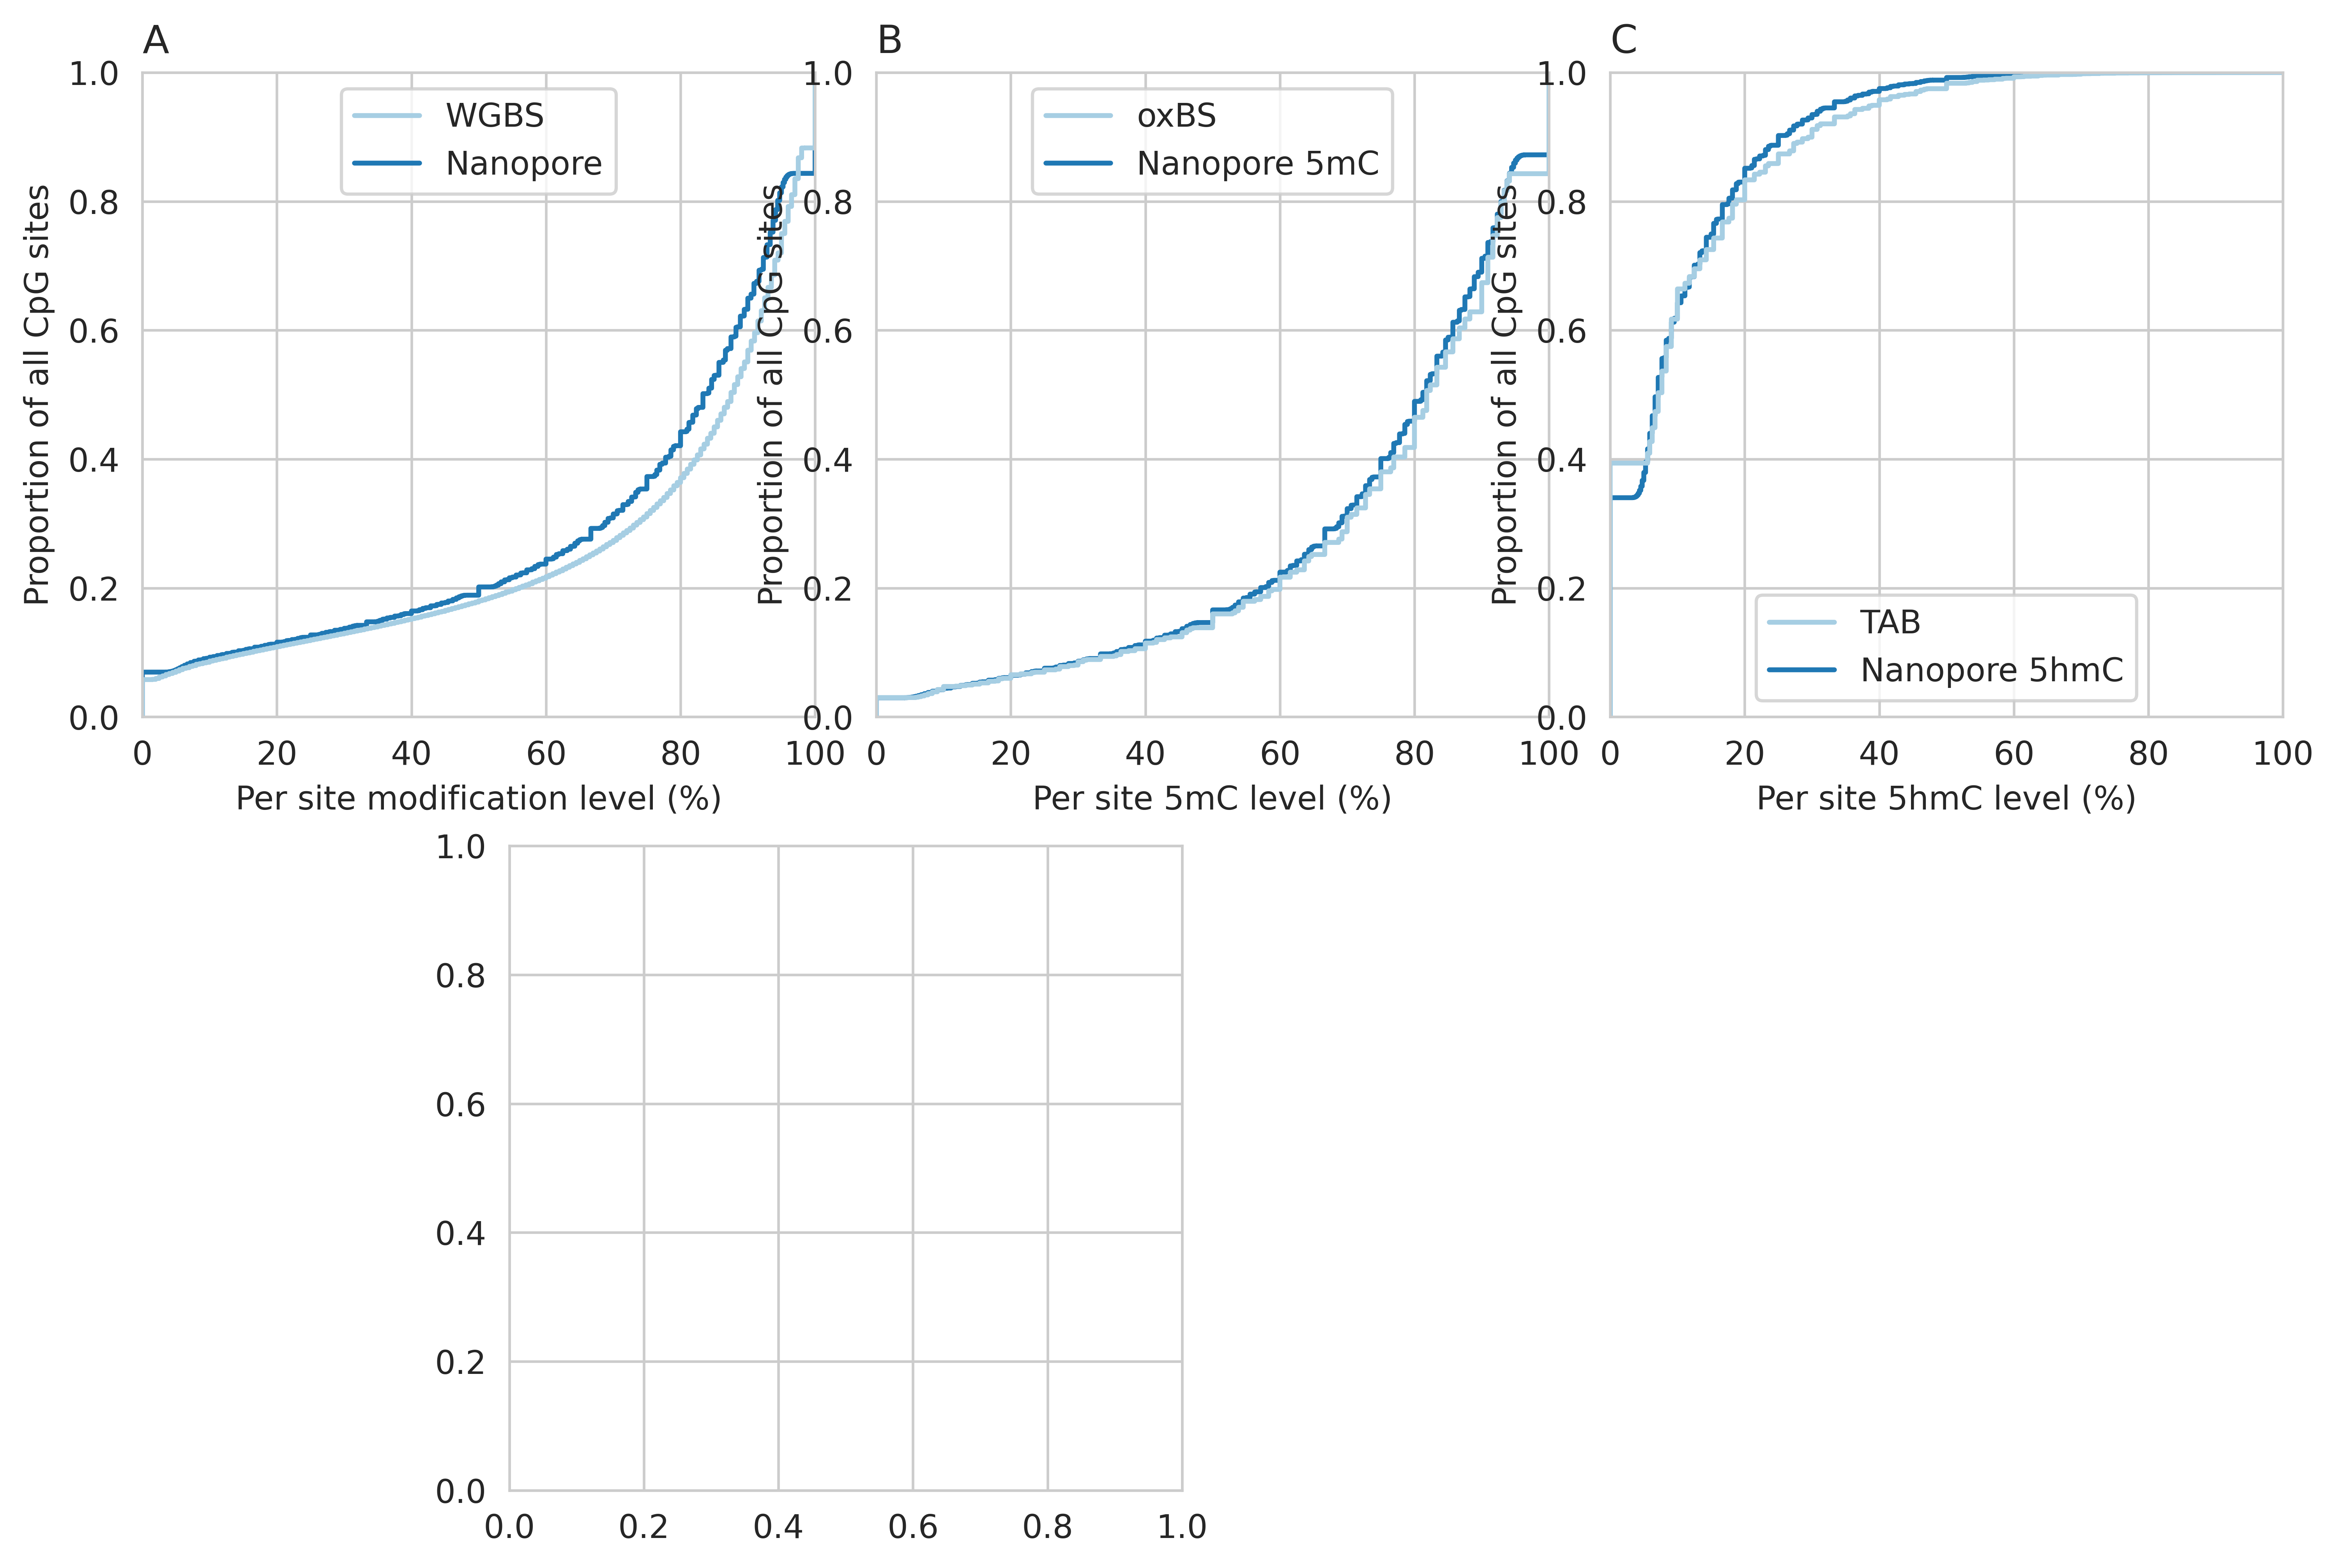

In [7]:
##### Figure 2 #####
sns.set_style("whitegrid")
sns.set_palette("Blues")

fig2 = plt.figure(figsize=((30)/2.54, (20)/2.54), dpi=600, facecolor="None")
gs2 = GridSpec(2, 6, fig2)

##### ax10 ##### 

ax200 = fig2.add_subplot(gs2[0, :2])

sns.ecdfplot(Checkpoint(path='./intermediates/two_mod_long.tsv').loadCheckpoint().replace("Bisulphite", "WGBS"), 
             x="percentMeth", hue="method", legend=True, palette="Paired", ax=ax200)
sns.move_legend(ax200, "upper center", title=None)
ax200.set_ylabel("Proportion of all CpG sites")
ax200.set_xlabel("Per site modification level (%)")
ax200.set_xlim([0, 100])
ax200.set_ylim([0, 1])
ax200.set_title("A", loc="left")

##### ax11 ##### 

ax11 = fig2.add_subplot(gs2[0, 2:4])

sns.ecdfplot(Checkpoint(path='./intermediates/mc_df_long.tsv').loadCheckpoint().replace(["Bisulphite", "Nanopore"], ["oxBS", "Nanopore 5mC"]), 
             x="percentMeth", hue="method", legend=True, palette="Paired", ax=ax11)
sns.move_legend(ax11, "upper center", title=None)
ax11.set_ylabel("Proportion of all CpG sites")
ax11.set_xlabel("Per site 5mC level (%)")
ax11.set_xlim([0, 100])
ax11.set_ylim([0, 1])
ax11.set_title("B", loc="left")

##### ax202 ##### 

ax202 = fig2.add_subplot(gs2[0, 4:])

sns.ecdfplot(Checkpoint(path='./intermediates/hmc_df_long.tsv').loadCheckpoint().replace(["Bisulphite", "Nanopore"], ["TAB", "Nanopore 5hmC"]), 
             x="percentMeth", hue="method", legend=True, palette="Paired", ax=ax202)
sns.move_legend(ax202, "lower center", title=None)
ax202.set_ylabel("Proportion of all CpG sites")
ax202.set_xlabel("Per site 5hmC level (%)")
ax202.set_xlim([0, 100])
ax202.set_ylim([0, 1])
ax202.set_title("C", loc="left")

##### Histogram shared #####

data = Checkpoint(path='./intermediates/three_mod_pyrange.tsv').loadCheckpoint()

##### ax220 #####

ax220 = fig2.add_subplot(gs2[1, 1:3])

gene_data = featureAndGene(CpGIntersects(data).group("genes"), 10)

gene_data.makeHist("count", ax220)
ax220.plot(np.arange(-5.5, 4, 1), np.arange(-5.5, 4, 1), color="black", linestyle=":")

gene_r, gene_p = gene_data.calcPearson()
gene_rho, gene_rhoP = gene_data.calcSpearman()

ax220.text(3-(5.5+3)/2, 3.3, "Pearson r = {r:.2f}".format(r=gene_r), ha="center")
ax220.text(3-(5.5+3)/2, 3.8, "Spearman \u03C1 = {rho:.2f}".format(rho=gene_rho), ha="center")
ax220.set_ylim((-5.5, 3))
ax220.set_xlim((-5.5, 3))
ax220.set_xlabel("TAB enrichment")
ax220.set_ylabel("Nanopore enrichment")
ax220.set_title("D", loc="left")

##### ax221 ##### 

ax221 = fig2.add_subplot(gs2[1, 3:5])

tile_data = tiledGroup(CpGIntersects(data).groupByGenomicWindow(300), 10)

tile_data.makeHist("density", ax=ax221)
ax221.plot(np.arange(-5.5, 4, 1), np.arange(-5.5, 4, 1), color="black", linestyle=":")

tile_r, tile_p = tile_data.calcPearson()
tile_rho, tile_p = tile_data.calcSpearman()

ax221.text(3-(5.5+3)/2, 3.3, "Pearson r = {r:.2f}".format(r=tile_r), ha="center")
ax221.text(3-(5.5+3)/2, 3.8, "Spearman \u03C1 = {rho:.2f}".format(rho=tile_rho), ha="center")
ax221.set_ylim((-5.5, 3))
ax221.set_xlim((-5.5, 3))
ax221.set_xlabel("TAB enrichment")
ax221.set_ylabel("Nanopore enrichment")
ax221.set_title("E", loc="left")

##### Outputs #####

fig2.set_tight_layout(True)
fig2.savefig('/u/n/doh28/Documents/Nanopore_HMC/Figures/Figure2.png')
fig2.tight_layout()

### Figure 2 Data Table
This data table highlights 300bp regions showing substantial hydroxymethylation in Nanopore or TAB, as well as regions enriched/depleted in both to act as controls. 

In [ ]:
data = Checkpoint(path='./intermediates/three_mod_pyrange.tsv').loadCheckpoint()

In [ ]:
all_tiles = tiledGroup(CpGIntersects(data).groupByGenomicWindow(300), 10)
all_tiles.exportTests(10)

In [ ]:
all_tiles.calcMannWhitney("less")

MannwhitneyuResult(statistic=27822203.0, pvalue=1.200434190068272e-13)

## Figure 3

/mnt/data1/doh28/tools/condas/GeneralAnalysis/lib/python3.9/site-packages/seaborn/utils.py:482: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)
/mnt/data1/doh28/tools/condas/GeneralAnalysis/lib/python3.9/site-packages/seaborn/utils.py:482: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


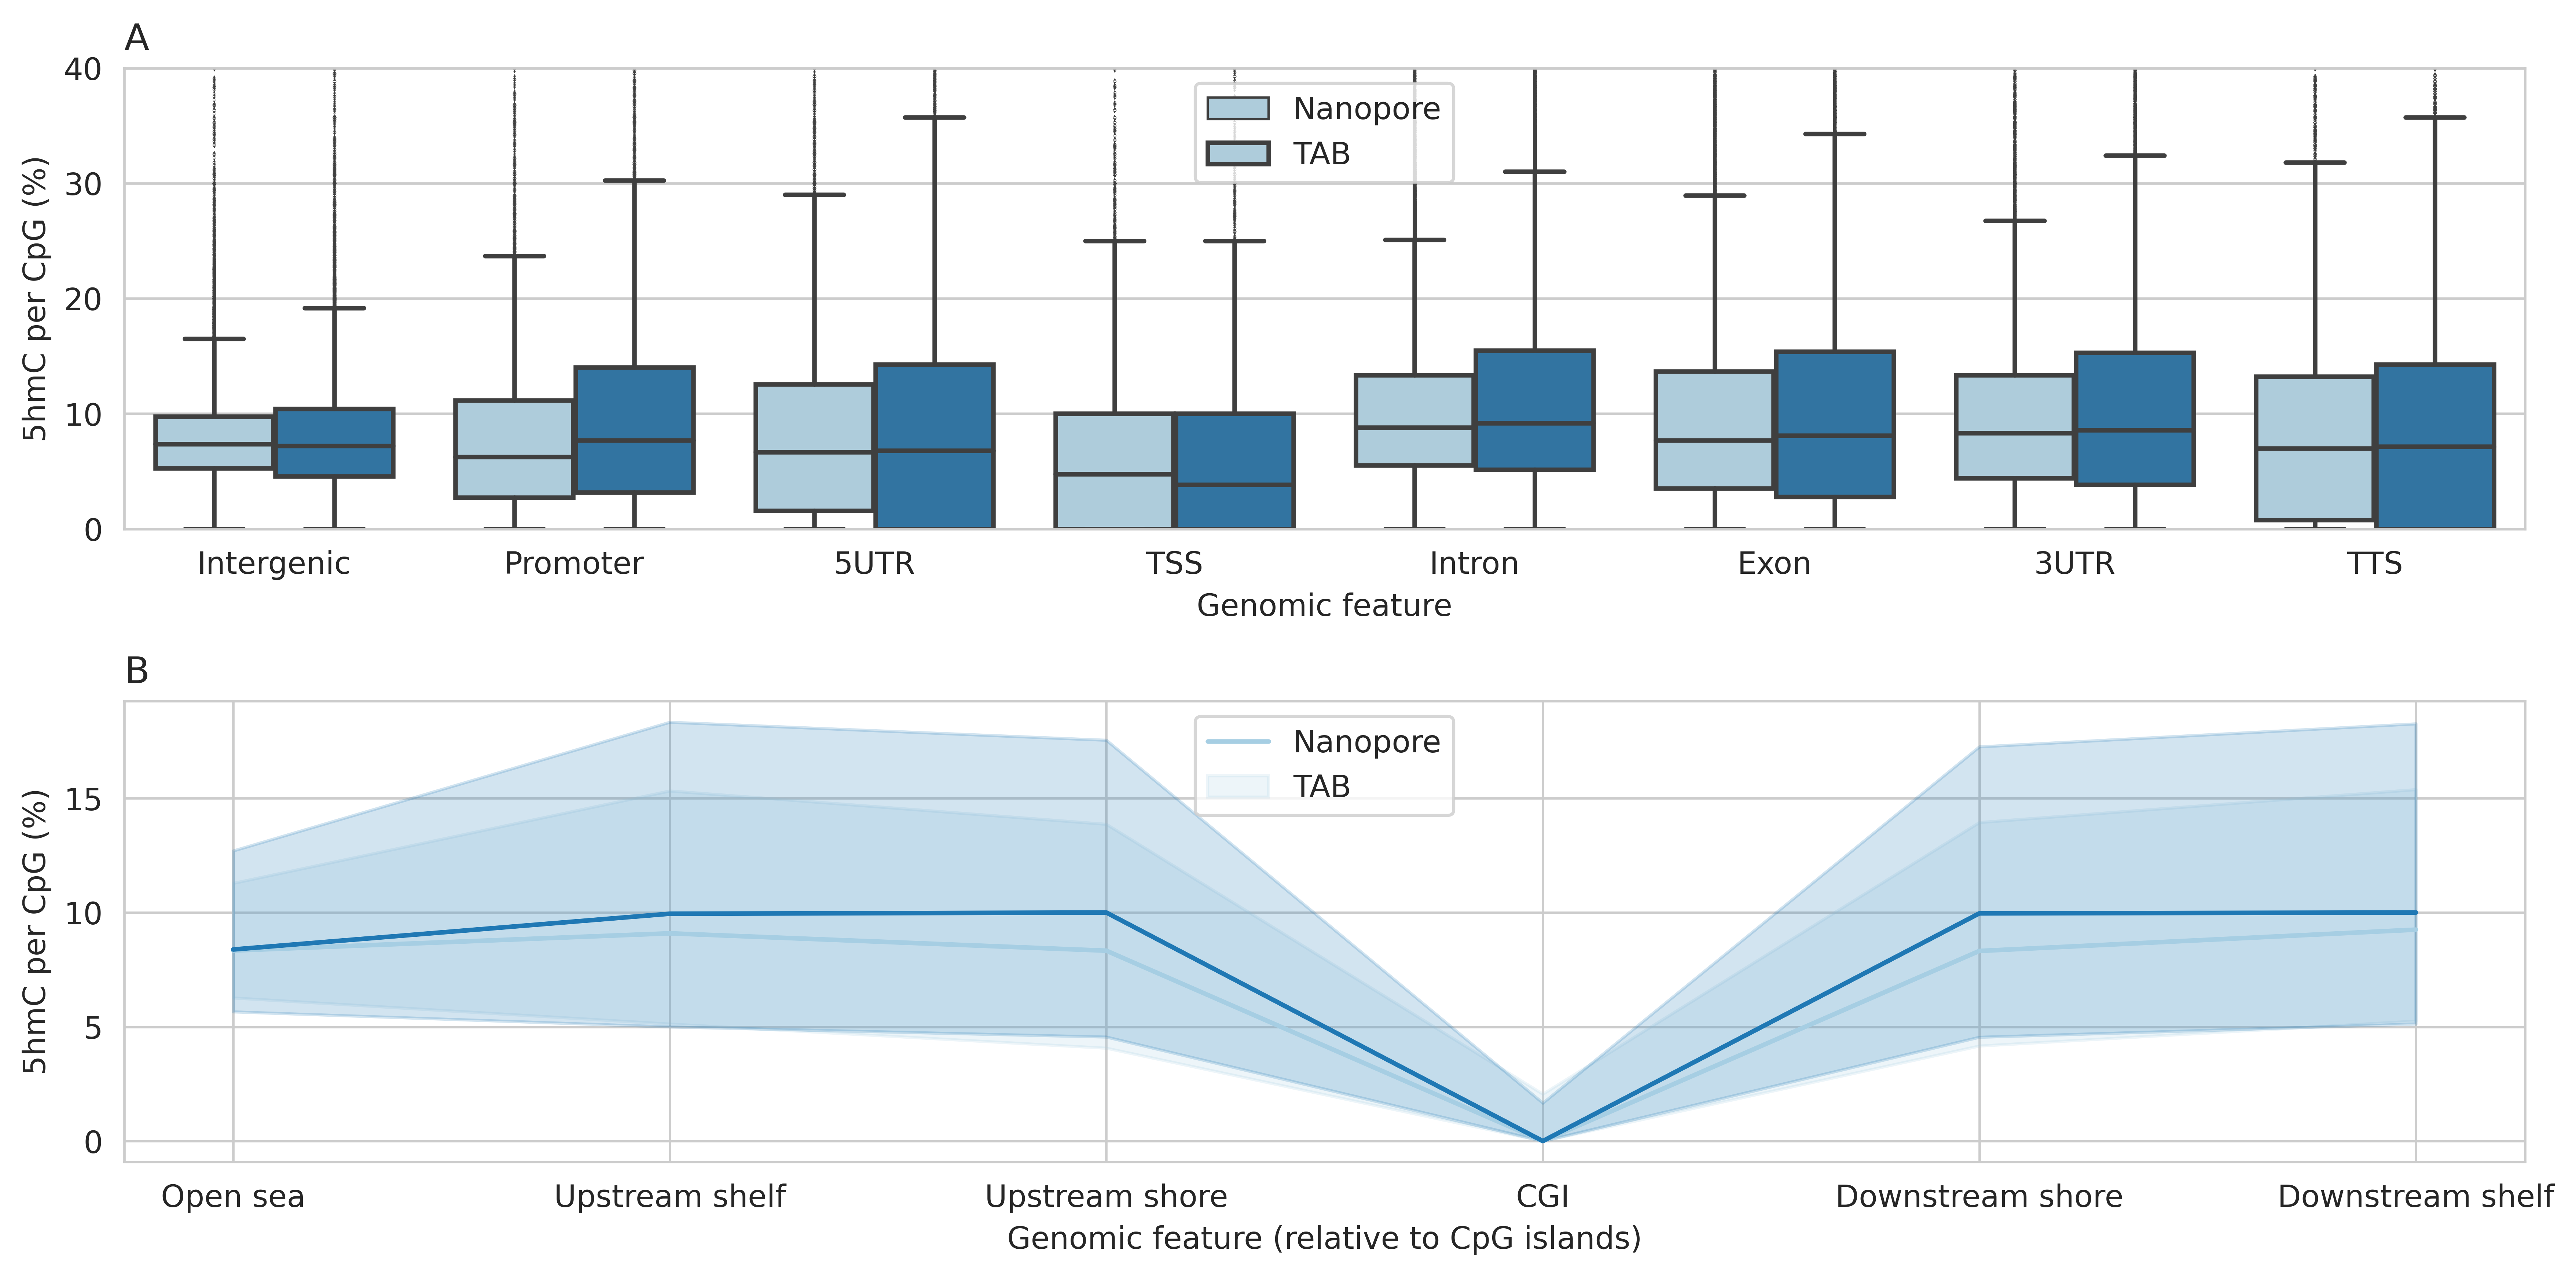

In [88]:
##### Figure 3 #####
sns.set_style("whitegrid")
sns.set_palette("Paired")

fig3 = plt.figure(figsize=((30/2.54), (15/2.54)), dpi=600)
gs3 = GridSpec(2, 1, fig3)

##### ax300 ##### 

ax300 = fig3.add_subplot(gs3[0, 0])

featureAndGene(CpGIntersects(data).group("features")).makeBoxplots(ax300)
sns.move_legend(ax300, "upper center", title=None, labels=["Nanopore", "TAB"])
ax300.set_title("A", loc="left")
ax300.set_ylim((0, 40))
ax300.set_ylabel("5hmC per CpG (%)")
ax300.set_xlabel("Genomic feature")

##### ax300 ##### 

ax310 = fig3.add_subplot(gs3[1, 0])

featureAndGene(CpGIntersects(data).group("CGI")).makeLineplot(ax310)
sns.move_legend(ax310, "upper center", title=None, labels=["Nanopore", "TAB"])
ax310.set_title("B", loc="left")
ax310.set_ylabel("5hmC per CpG (%)")
ax310.set_xlabel("Genomic feature (relative to CpG islands)")

##### Output #####

fig3.set_tight_layout(True)
fig3.savefig('/u/n/doh28/Documents/Nanopore_HMC/Figures/Figure3.png')
fig3.show()